# Problem Description

You have information on creatures from the wildly popular game "Tappymon Stop" in the following form:

| Creature    | Type  | Attack Name | Attack Damage | Attack Duration (s) |
|-------------|-------|-------------|---------------|---------------------|
| Slowtap     | Water | Sploosh     |             5 |                   2 |
| Seatras     | Water | Spray       |             8 |                 1.1 |
| Slowsis     | Water | Sploosh     |            10 |                   2 |
| Ceevee      | Earth | Pwoosh      |            15 |                 5.5 |
| Fireworkeon | Fire  | Fwoosh      |            35 |                   6 |

Assume that the only types of Tappymon Stop creatures are Water, Fire, and Earth. However, there are many creature and attack names, and more are frequently added.

This information is available in `csv` format in the file `tappy.csv`.

## Planning

### Step 1a: Identify the information in the file your program will read

The files contain information on creatures in the game Tappymon stop, each with its name, its type (one of Water, Fire, and Earth), its attack name, damage (in points per attack), and duration (in seconds for the attack). Damage is always an integer, but attack duration may not be.

### Step 1b: Write a description of what your program will produce

Here are a few things we might do with this data:

5. Find all the creatures with a given attack name.
6. Chart the "damage per second" (attack damage divided by attack duration) vs. damage
7. Create a scatterplot of duration vs. damage.

We'll focus on the second of these, but we'll represent *all* the information in the file for future use in other analyses.

**We will make the assumption that (as in the example above) the information is provided in sorted order by attack damage.**

### Step 1c: Write or draw examples of what your program will produce

We'll use the small example above to show what we might produce.

Plotting this data, it might look a bit like the following:

          |                                                
        9 |                                                   
          |      *                                           
        6 |     / \                         *
          |    |   *----\ /----------------/                        
        3 |    |         *                    
          |   *                              
          +------------------------------------------------
              5   10   15   20   25   30   35   40

## Building the Program

### Step 2a: Design data definitions



In [25]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv

CreatureType = Enum('CreatureType', ['Water', 'Earth', 'Fire'])


#interp. a CreatureType that can either be water, Earth, or fire
#examples are redundant for enumerations

@typecheck
def fn_for_creature_type(ct: CreatureType) -> ...:
    #template from enumeration (3 times)
    if ct == CreatureType.Water:
        return ...
    elif ct == CreatureType.Earth:
        return ...
    elif ct== CreatureType.Fire:
        return ...

Creature = NamedTuple('Creature', [('name', str), 
                                   ('type', CreatureType), 
                                   ('attack_name', str), 
                                   ('attack_damage', int), #in range[0, ...)
                                  ('attack_duration', float)]) #in range [0, ...)

#interp. a creature with a name, type, attack name, attack damage, and attack duration

C0 = Creature('Slowtap',CreatureType.Water,'Sploosh',5,2)
C1 = Creature('Slowsis', CreatureType.Water,'Sploosh',10,2)
C2 = Creature('Ceevee',CreatureType.Earth,'Pwoosh',15,5.5)
C3 = Creature('Seatras',CreatureType.Water,'Spray',8,1.1)
C4 = Creature('Fireworkeon',CreatureType.Fire,'Fwoosh',35,6)

@typecheck
def fn_for_creature(c: Creature) -> ...:
    #template based on Compound (4 fields) and reference rule
    return ...(c.name, fn_for_creature_type(c.type), c.attack_name, c.attack_damage, c.attack_duration)

#List[Creature]

#interp. a list of creatures

L0 = []
L1 = [C0,C1,C2]
L2 = [C0,C3,C4,C1]

@typecheck
def fn_for_loc(loc: List[Creature]) -> ...:
    #template from List[Creature] and reference rule
    #description of accumulator
    acc = ... #type:
    for c in loc:
        acc = ...(fn_for_creature(c), acc)
    return...(acc)


### Step 2b: Design a function to read the information and store it as data in your program

In [26]:
@typecheck
def parse_creature_type(ct: str) -> CreatureType:
    """
    returns a CreatureType, given its string form
    """
    #template from atomic non-distinct
    #return...(ct)
    if ct == 'Water':
        return CreatureType.Water
    elif ct=='Fire':
        return CreatureType.Fire
    elif ct=='Earth':
        return CreatureType.Earth

@typecheck
def read(filename: str) -> List[Creature]:
    """
    reads information from the specified file and returns a list of creatures
    """
    #return [] #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Creature]
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        next(reader) # skip header line
        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            c = Creature(row[0], parse_creature_type(row[1]) ,row[2], parse_int(row[3]), parse_float(row[4]))
            loc.append(c)
    return loc



### Step 2c: Design functions to analyze the data

Our main analysis function will plot the damage per second (DPS) versus damage. To do that, we need to extract the damages and the DPS's. To do the latter, we need to find the DPS of a Tappymon Creature.


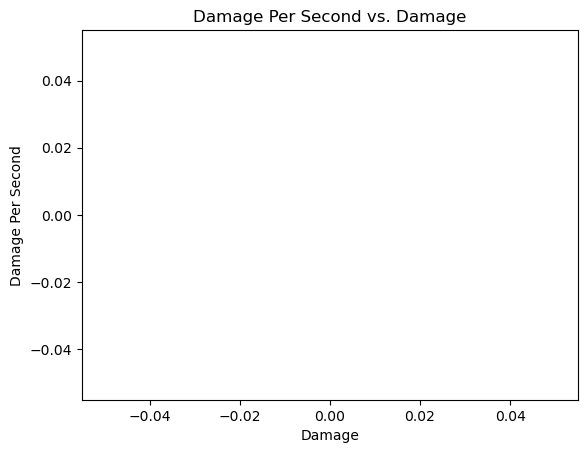

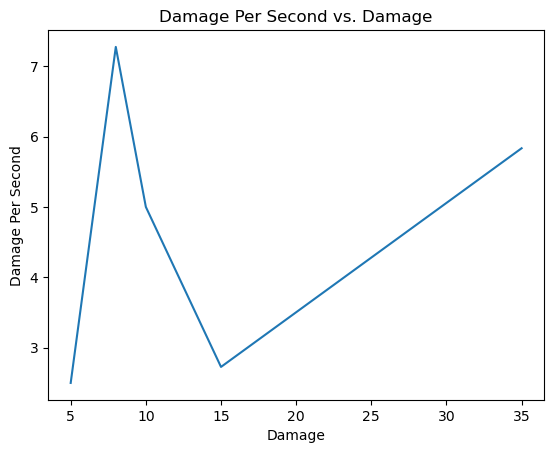

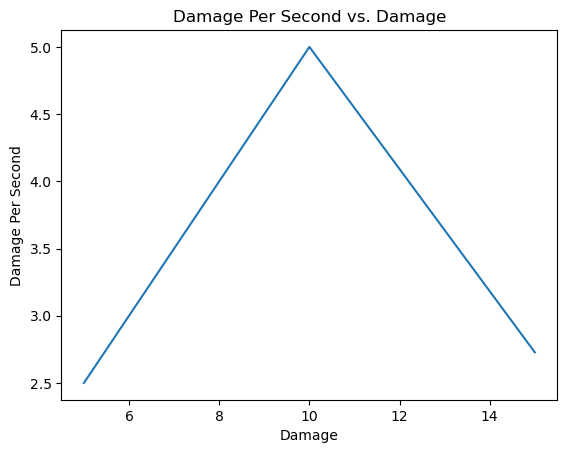

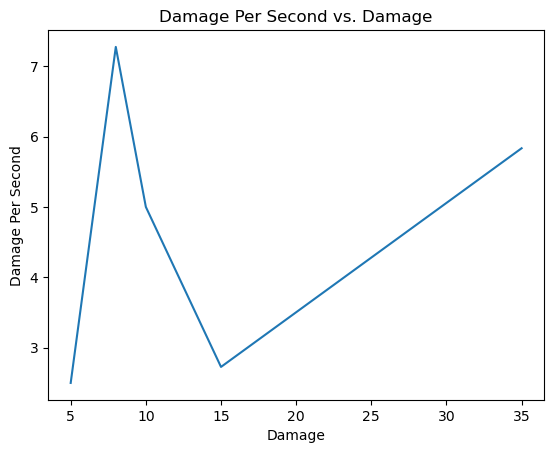

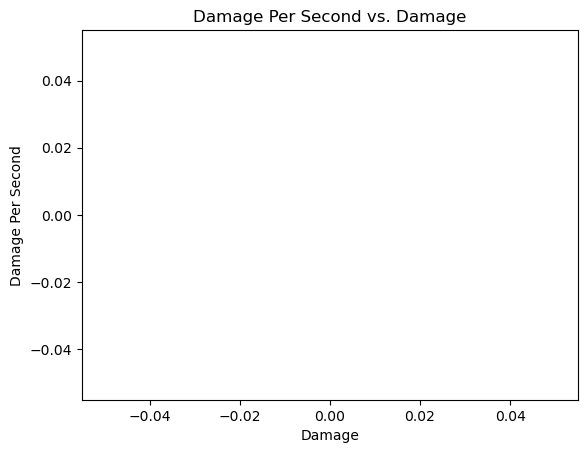

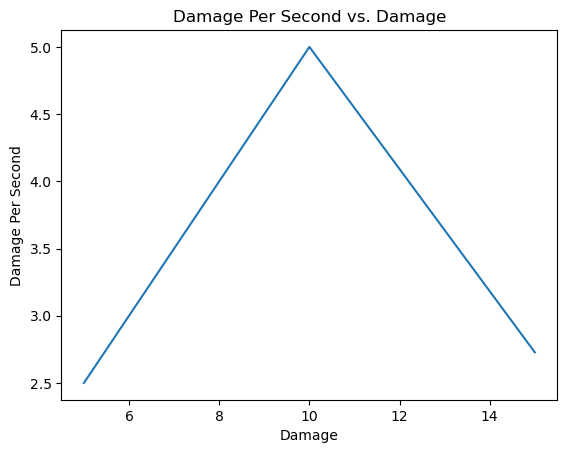

18 of 18 tests passed


In [27]:
import matplotlib.pyplot as pyplot

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    
    return plot_chart(read(filename))


@typecheck 
def calculate_damage_per_second(c: Creature) -> float:
    """
    returns attack damage divided by the attack duration of a creature
    ASSUMES attack duration is never 0
    """
    #return 1.0 #stub
    #template from Creature
    return (c.attack_damage/c.attack_duration)

@typecheck 
def get_damages_per_second(loc: List[Creature]) -> List[float]:
    """
    returns a list of damages per second calculated from loc (attack damage divided by attack duration)
    """
    #return [] #stub
    #template from List[Creature]
    #damages_per_second is the list of damages per second calculated so far from loc
    damages_per_second = [] #type: List[float]
    for c in loc:
        damages_per_second.append(calculate_damage_per_second(c))
    return damages_per_second

@typecheck 
def get_damages(loc: List[Creature]) -> List[int]:
    """
    returns a list of damage values from loc
    """
    #return [] #stub
    #template from List[Creature]
    #damages is the list of damages retrieved from loc so far
    damages = [] #type: List[int]
    for c in loc:
        damages.append(c.attack_damage)
    return damages

@typecheck
def plot_chart(loc: List[Creature]) -> None:
    """
    Plots a chart of damage per second vs. damage
    If loc is empty, a graph will still be produced but with no plotted values. 
    There will be an x-label, y-label, and graph title
    """
    #return None
    #template from composition
    damages_per_second_values = get_damages_per_second(loc)
    damages = get_damages(loc)
    pyplot.xlabel('Damage')
    pyplot.ylabel('Damage Per Second')
    pyplot.title('Damage Per Second vs. Damage')
    chart = pyplot.plot(damages, damages_per_second_values)
    pyplot.show()
    return None


start_testing()

#expect to see an empty graph with no plotted points but with x-axis labelled 'Damage', y-axis labelled 
#'Damage Per Second', and title 'Damage per Second vs. Damage'
expect(main("empty_tappy.csv"), None)

#expect to see a well plotted graph with x-axis labelled 'Damage', y-axis labelled 
#'Damage Per Second', and title 'Damage per Second vs. Damage'
expect(main("tappy.csv"), None)

#expect to see a well plotted graph with x-axis labelled 'Damage', y-axis labelled 
#'Damage Per Second', and title 'Damage per Second vs. Damage'
expect(main("short_tappy.csv"), None)

expect(calculate_damage_per_second(C0), 5/2)
expect(calculate_damage_per_second(C2), 15/5.5)
expect(get_damages_per_second(L0), [])
expect(get_damages_per_second(L1),[5/2, 10/2, 15/5.5])
expect(get_damages(L0), [])
expect(get_damages(L1), [5,10,15])

#expect to see a well plotted graph with x-axis labelled 'Damage', y-axis labelled 
#'Damage Per Second', and title 'Damage per Second vs. Damage'
expect(plot_chart([Creature('Slowtap',CreatureType.Water,'Sploosh',5,2), Creature('Seatras',CreatureType.Water,'Spray',8,1.1),
                  Creature('Slowsis',CreatureType.Water,'Sploosh',10,2), Creature('Ceevee',CreatureType.Earth,'Pwoosh',15,5.5),
                  Creature('Fireworkeon',CreatureType.Fire,'Fwoosh',35,6)]), None)

#expect to see an empty graph with no plotted points but with x-axis labelled 'Damage', y-axis labelled 
#'Damage Per Second', and title 'Damage per Second vs. Damage'
expect(plot_chart([]), None)

#expect to see a well plotted graph with x-axis labelled 'Damage', y-axis labelled 
#'Damage Per Second', and title 'Damage per Second vs. Damage'
expect(plot_chart([Creature('Slowtap',CreatureType.Water,'Sploosh',5,2), Creature('Slowsis',CreatureType.Water,'Sploosh',10,2),
                   Creature('Ceevee',CreatureType.Earth,'Pwoosh',15,5.5)]), None)

expect(read("empty_tappy.csv"), [])
expect(read("short_tappy.csv"), [Creature('Slowtap',CreatureType.Water,'Sploosh',5,2), Creature('Slowsis',CreatureType.Water,'Sploosh',10,2),
                   Creature('Ceevee',CreatureType.Earth,'Pwoosh',15,5.5)])
expect(read("tappy.csv"), [Creature('Slowtap',CreatureType.Water,'Sploosh',5,2), Creature('Seatras',CreatureType.Water,'Spray',8,1.1),
                  Creature('Slowsis',CreatureType.Water,'Sploosh',10,2), Creature('Ceevee',CreatureType.Earth,'Pwoosh',15,5.5),
                  Creature('Fireworkeon',CreatureType.Fire,'Fwoosh',35,6)])

expect(parse_creature_type('Water'), CreatureType.Water)
expect(parse_creature_type('Fire'), CreatureType.Fire)
expect(parse_creature_type('Earth'), CreatureType.Earth)

summary()

Note that we're not asking you for the `main` function, though it may be good practice to design it anyway!